In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter('ignore')
import os

In [2]:
data = pd.read_csv('preprocessed_data.csv')
data.head()

,Unnamed: 0,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,casualty_type,casualty_home_area_type,casualty_imd_decile
0,0,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Car occupant,Urban area,9
1,1,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Car occupant,Urban area,2
2,2,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Car occupant,Urban area,10
3,3,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Car occupant,Small town,10
4,4,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Car occupant,Rural,7


In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.to_csv('preprocessed_data.csv', index=False)
data.head()

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Car occupant,Urban area,9
1,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Car occupant,Urban area,2
2,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Car occupant,Urban area,10
3,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Car occupant,Small town,10
4,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Car occupant,Rural,7


## Relation Between Sex And Age Of Casualties

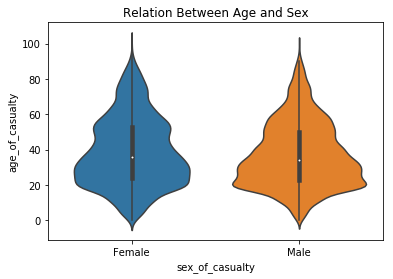

In [18]:
sns.violinplot(data=data, x='sex_of_casualty', y='age_of_casualty').set_title('Relation Between Age and Sex');
plt.savefig('sex_age_relation.jpg')

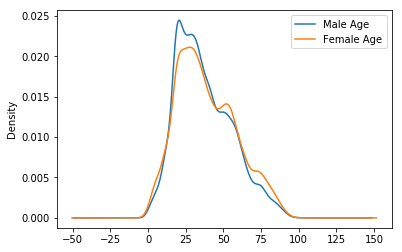

In [142]:
male_ages.plot.kde();
female_ages.plot.kde();
plt.legend(['Male Age', 'Female Age'])
plt.savefig('male_female_age_distribution.jpg')

## Relation Between Sex And Severity Of Casualty

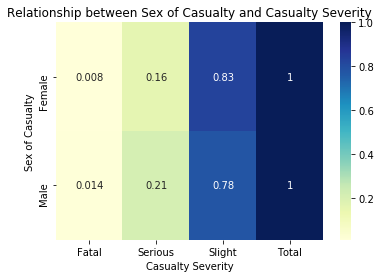

In [92]:
cross_tab = pd.crosstab(data['sex_of_casualty'], data['casualty_severity'], margins=True, margins_name='Total')
res = cross_tab.div(cross_tab['Total'], axis=0)
res.drop('Total', axis='index', inplace=True)
sns.heatmap(res, annot=True, cmap="YlGnBu", linecolor='grey')
plt.title('Relationship between Sex of Casualty and Casualty Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Sex of Casualty')
plt.savefig('sex_severity_relation.jpg')


### Statistical Test For Difference Between Severity Based On Sex

In [164]:
from scipy.stats import chi2_contingencyذ
sex_severity_contingency_table = pd.crosstab(data['sex_of_casualty'], data['casualty_severity'],)
keys = ['chi2', 'p', 'dof', 'expected']
values = chi2_contingency(sex_severity_contingency_table)
sex_severity_statics = dict(zip(keys, values))
sex_severity_statics

{'chi2': 251.90496939092313,
 'p': 1.9931083782614014e-55,
 'dof': 2,
 'expected': array([[  245.18755107,  3941.38988338, 16444.42256555],
        [  394.81244893,  6346.61011662, 26479.57743445]])}

## Relation Between IMD Decile and Severity Of Casualty

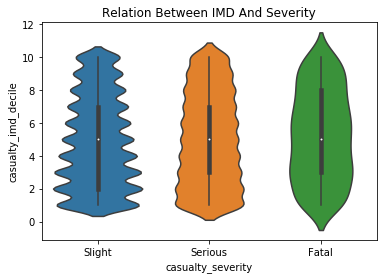

In [31]:
fig = sns.violinplot(data=data, x='casualty_severity', y='casualty_imd_decile')
fig.set_title('Relation Between IMD And Severity');
plt.savefig('imd_severity_relation.jpg')

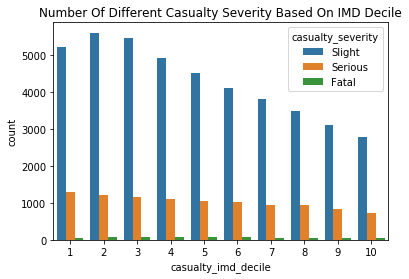

In [127]:
fig = sns.countplot(x='casualty_imd_decile', hue='casualty_severity', data=data);
fig.set_title('Number Of Different Casualty Severity Based On IMD Decile');
plt.savefig('imd_severity_number.jpg')

### Statistical Test For Meaningful Difference Between Severity Of Casualties Of Different Deciles

In [129]:
severity_imd_contingency_table = pd.crosstab(data.casualty_imd_decile, data.casualty_severity)
keys = ['chi2', 'p', 'dof', 'expected']
values = chi2_contingency(severity_imd_contingency_table)
imd_severity_statics = dict(zip(keys, values))
imd_severity_statics

{'chi2': 70.81438545688114,
 'p': 3.28899432120436e-08,
 'dof': 18,
 'expected': array([[  77.98559014, 1253.61836144, 5230.39604843],
        [  81.87179678, 1316.08913318, 5491.03907004],
        [  79.3047612 , 1274.82403625, 5318.87120256],
        [  72.15033796, 1159.81668276, 4839.03297928],
        [  66.63596524, 1071.1731412 , 4469.19089356],
        [  61.89408007,  994.94733715, 4151.15858278],
        [  57.33046126,  921.58716482, 3845.08237391],
        [  53.21845057,  855.48659288, 3569.29495655],
        [  47.50204264,  763.59533536, 3185.902622  ],
        [  42.10651415,  676.86221496, 2824.03127089]])}

## Relation Between Age And Severity

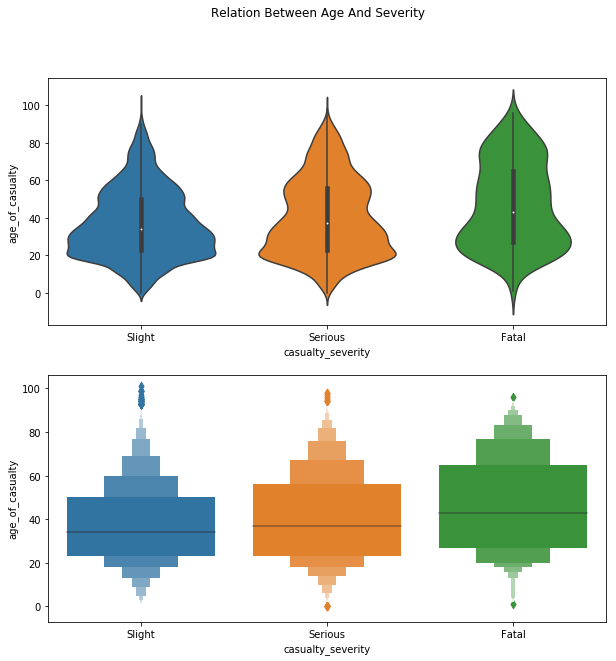

In [124]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
violin_fig = sns.violinplot(data=data, x='casualty_severity', y='age_of_casualty', ax=ax[0]);
boxen_fig = sns.boxenplot(data=data, x='casualty_severity', y='age_of_casualty', ax=ax[1]);

fig.suptitle('Relation Between Age And Severity')

plt.savefig('age_severity_relation.jpg')

## Relation Between Home Area And Casualty Severity

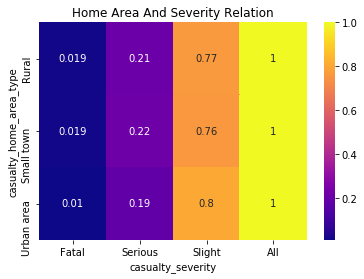

In [100]:
home_severity_crosstab = pd.crosstab(data['casualty_home_area_type'], data['casualty_severity'], margins=True)
res = home_severity_crosstab.apply(lambda col: col / col['All'], axis=1)
res.drop('All', axis='index', inplace=True)
sns.heatmap(res, cmap='plasma', annot=True).set_title('Home Area And Severity Relation');
plt.savefig('home_severity_relation.jpg')

### Statistical Test For Difference Between Groups Of Home Area And Severity

In [111]:
home_severity_contingency_table = pd.crosstab(data['casualty_home_area_type'],
                                              data['casualty_severity'])
keys = ['chi2', 'p', 'dof', 'expected']
values = chi2_contingency(home_severity_contingency_table)
home_area_severity_statics = dict(zip(keys, values))
home_area_severity_statics

{'chi2': 112.34478449875981,
 'p': 2.3005219187121577e-23,
 'dof': 4,
 'expected': array([[   69.59518681,  1118.74262794,  4667.66218525],
        [   53.02829978,   852.42991904,  3556.54178118],
        [  517.37651341,  8316.82745302, 34699.79603357]])}

## Relation Between Casualty Class And Severity

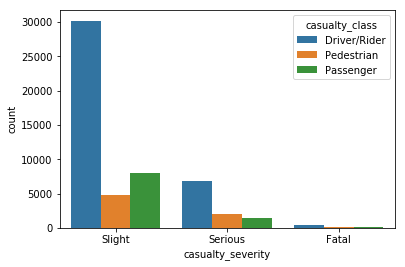

In [155]:
fig = sns.countplot(data=data, hue='casualty_class', x='casualty_severity');
plt.savefig('casualty_class_severity_relation.jpg')

In [156]:
class_severity_contingency_table = pd.crosstab(data.casualty_class,
                                               data.casualty_severity)
keys = ['chi2', 'p', 'dof', 'expected']
values = chi2_contingency(class_severity_contingency_table)
class_area_severity_statics = dict(zip(keys, values))
class_area_severity_statics

{'chi2': 546.9344561242452,
 'p': 4.7117513915524364e-117,
 'dof': 4,
 'expected': array([[  444.83398945,  7150.70638045, 29834.4596301 ],
        [  113.19913838,  1819.67614945,  7592.12471217],
        [   81.96687217,  1317.6174701 ,  5497.41565773]])}

# Goodness Of Fit Test On IMD Decile Distribution

In [3]:
from scipy.stats import chisquare
observed = data.casualty_imd_decile.value_counts()
expected = pd.Series([len(data)/10] * 10)
chi2, p = chisquare(observed, f_exp=expected)
p

0.0

In [179]:
data.to_csv('model_data.csv', index=False)